In [1]:
#number 1
import math
import numpy as np
from time import sleep

#import perfplot
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

N = 10;
M = 4;
L = 0;
eps = 0.01;
bh = [ [-1,0], [0,-1], [1, 0], [0,1]]
bhh = [-M,-1,M,1]
END = (N-1)*M

In [33]:
def isValid(x,y):
    ss = xyTos(x,y)
    if x>= N or y>=M or y < 0 or x <0 :
        return False
    return True
    
def statetransit(x1,y1,x2,y2):
    if isValid(x2,y2) == False:
        return -9999999
    if abs(x1-x2) + abs(y1-y2) == 1:
        if y2 == 0 and x2 >= 1 and x2 < N-1:
            return -100;
        if y2 == 0 and x2 == N-1 :
            return 0;
        else:
            return -1
    else:
        return -9999999;
    
def sToxy(s):
    y = s % M
    x = s / M
    return (int(x),y)
def xyTos(x,y):
   
    return x*M+y
def getAction(state,nstate):
    if nstate-state == 1:
        return 3;
    if nstate-state == M:
        return 2;
    if nstate-state == -1:
        return 1;
    if nstate-state == -M:
        return 0;
def randBelongList(lst):
    mi = np.min(lst)
    g = 1/mi
    summer = np.sum(lst) * g
    r = np.random.randint(summer)
    s = 0
    idx = 0
    for l in lst:
        s += l * g
        if s > r:
            return idx
        idx += 1
    
def ActionFromQ(Q,eps,S):
    (x,y) = sToxy(S);
    rewards = [None] * 4
    Qs = [None] * 4
    
    rewards[0] = statetransit(x,y,x+bh[0][0],y+bh[0][1]);
    rewards[1] = statetransit(x,y,x+bh[1][0],y+bh[1][1]);
    rewards[2] = statetransit(x,y,x+bh[2][0],y+bh[2][1]);
    rewards[3] = statetransit(x,y,x+bh[3][0],y+bh[3][1]);
    Qs = Q[S]
    
    maxr = -99999999
    idx = 0;
    lst = np.zeros(4);
    
    semicnt =0
    idx = [0]
    for i in range(4):
        if maxr < Qs[i]:
            maxr = Qs[i];
            idx = [i]
           # idx = idx.append(i)
            semicnt = 1
        elif maxr == Qs[i]:
            idx . append (i)
            semicnt +=1;
        lst[i] = eps 
    for i in idx:
        lst[i] = (1- (4-semicnt)*eps) / semicnt 
   # print(lst)
    while(True):
        r = randBelongList(lst);
     #   print(r , " , ", rewards)
        if rewards[r] == -9999999:
            continue
        else :
            break;
    return (r,rewards[r])
def findlenbackwards(p):
    for i in range(len(p)-1, -1, -1):
        if p[i] != None:
         #   print (i)
            return i
    
        
def q_sarsa(a,eps,gamma , Q , p):
    l = findlenbackwards (p)
    avgRewardperEpisode = 0
    sumup = 0

    for i in range (l):
        S = p[l-i-1]
        (A,R) = ActionFromQ(Q,eps,S);
        while(True):
            Sp = S + bhh[A]
            sumup = sumup + R;
            (Ap,R2) = ActionFromQ(Q,eps,Sp);
            Q[S,A] = Q[S,A] + a * ( R + gamma * Q[Sp,Ap] - Q[S,A])
            S = Sp;
            A = Ap;
            R = R2
            if S == (N-1) * M:
                break
        
    avgRewardperEpisode = sumup / l
    return (Q, avgRewardperEpisode)
      
def q_Qlearning(a,eps,gamma , Q , p):
    l = findlenbackwards (p)
    avgRewardperEpisode = 0
    sumup = 0
    for i in range (l):
        S = p[l-i-1]
        
        while(True):
            
            (A,R) = ActionFromQ(Q,eps,S);
            Sp = S + bhh[A]
            sumup = sumup + R;
            maxQ = -999999
            for i in range (4):
                if maxQ < Q[Sp,i]:
                    maxQ = Q[Sp,i]
            
            Q[S,A] = Q[S,A] + a * ( R + gamma * maxQ - Q[S,A])
            
            S = Sp;
                       
            if S == (N-1) * M:
                break
    avgRewardperEpisode = sumup / l
    return (Q , avgRewardperEpisode)
        

In [3]:
def outcheck(x,y):
    if x < 0 or y <0 or x >= N or y >= M:
        return False
    return True;

def re(x,y,depth,v):
    global flag
    global path
    global L
    v_bh = np.zeros([4]);
    v[x][y] = 1;
   # print(v)
    path[depth] = xyTos(x,y)
    if x == N-1 and y == 0:
    #    print(v)
        flag = 1
        L = depth;
        return;
    while(True):
        if np.sum(v_bh) == 4:
            break;
        r = randBelongList([3,3,3,3])
        r = r % (4-np.sum(v_bh))
        for i in range(0,4):
            if v_bh[i] == 0:
                r-=1
            if r == -1:
                break
        r = i
        
        nx = x + bh[r][0];
        ny = y + bh[r][1];
        v_bh[r] = 1
       
        if outcheck (nx,ny) == False:
            continue;
        if v[nx][ny] == True:
            continue;
        re(nx,ny,depth+1,v)
        if flag == 1:
            return;
                
    v[x][y] = 0;
    path[depth] = None;

def episodegenerator():
    global path
    global flag
    v = np.zeros([N,M])
    sx = 0;
    sy = 0;
    v[0][0] = 1
    flag = 0;
    path = [None] * N*M
    re(0,0,0,v)

    

In [22]:
Q = np.random.rand(40,4)
for i in range(N):
    Q[i*M , 1] = -9999999
    Q[i*M+M-1,3] = -9999999
for i in range(M):
    Q[i , 0] = -9999999
    Q[(N-1)*M+i,2] = -9999999

In [12]:
Q = np.random.rand(40,4)
for i in range(N):
    Q[i*M , 1] = -9999999
    Q[i*M+M-1,3] = -9999999
for i in range(M):
    Q[i , 0] = -9999999
    Q[(N-1)*M+i,2] = -9999999
    
path2 = []
for i in  tqdm(range (1000)):

    episodegenerator()
    if i == 1:
        path2.append(path)
    else:
        path2.append(path)
        

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.33it/s]


In [53]:
uniformpath = []
for i in range(N):
    for j in range(M-1,-1,-1):
        uniformpath.append(xyTos(i,j))

In [23]:
rewardList = []
for i in  tqdm(range (1000)):
     #(Q,rewardList) = q_sarsa(0.9,0.01,0.98 , uniformpath)
    
    (Q,reward) = q_sarsa(0.9,0.01,0.98 , Q,path2[i])
    rewardList.append(reward)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.44it/s]


In [34]:
QQ = np.random.rand(40,4)
for i in range(N):
    QQ[i*M , 1] = -9999999
    QQ[i*M+M-1,3] = -9999999
for i in range(M):
    QQ[i , 0] = -9999999
    QQ[(N-1)*M+i,2] = -9999999
rewardList_Q = []
for i in  tqdm(range (1000)):
     #(Q,rewardList) = q_sarsa(0.9,0.01,0.98 , uniformpath)
    
    (QQ,reward) = q_Qlearning(0.9,0.01,0.98 , QQ,path2[i])
    rewardList_Q.append(reward)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 163.75it/s]


[[1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]]


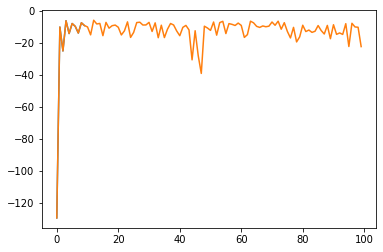

In [27]:
sx = 0
sy = 0
S = 0
idx = 0

V = np.zeros([N,M])
S=0
while(True):
    
    Qs = Q[S]
    maxr = -9999999
    for i in range(4):
        (x,y) = sToxy( S+bhh[i] )
        if Qs[i] <= -99999:
            continue;
        if V[x][y] == 1:
            continue;
        if maxr < Qs[i]:
            maxr = Qs[i];
            idx = i
    NS = S + bhh[idx];
    (x,y) = sToxy(S);
   # print(x, y )
    V[x][y] = 1
    S = NS
    if S == END:
        break
(x,y) = sToxy(S);
V[x][y] = 1
print(V)
plt.plot(rewardList[0:10])
plt.plot(rewardList[0:100])

[[1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 1. 0. 0.]]


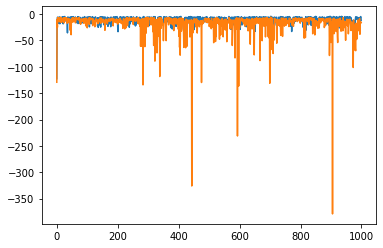

In [37]:
V = np.zeros([N,M])
S=0
while(True):
    
    Qs = QQ[S]
    maxr = -9999999
    for i in range(4):
        (x,y) = sToxy( S+bhh[i] )
        if Qs[i] <= -99999:
            continue;
        if V[x][y] == 1:
            continue;
        if maxr < Qs[i]:
            maxr = Qs[i];
            idx = i
    NS = S + bhh[idx];
    (x,y) = sToxy(S);
   # print(x, y )
    V[x][y] = 1
    S = NS
    if S == END:
        break
(x,y) = sToxy(S);
V[x][y] = 1
print(V)
plt.plot(rewardList_Q[0:1000])
plt.plot(rewardList[0:1000])

In [11]:
Q

array([[-9.99999900e+06, -9.99999900e+06, -5.00057959e+01,
        -5.01059084e+01],
       [-9.99999900e+06, -5.01343988e+01, -5.49622500e+01,
        -5.00361641e+01],
       [-9.99999900e+06, -5.04623828e+01, -5.00641459e+01,
        -5.01978050e+01],
       [-9.99999900e+06, -5.00102625e+01, -5.00826335e+01,
        -9.99999900e+06],
       [-5.00057012e+01, -9.99999900e+06, -5.06746799e+01,
        -5.00990980e+01],
       [-5.00133587e+01, -5.05895858e+01, -5.01836062e+01,
        -5.01241548e+01],
       [-5.00356986e+01, -5.05608246e+01, -5.01380550e+01,
        -5.01693804e+01],
       [-5.00740262e+01, -5.00265015e+01, -5.06952967e+01,
        -9.99999900e+06],
       [-5.00587980e+01, -9.99999900e+06, -5.00931394e+01,
        -5.01268179e+01],
       [-5.00831650e+01, -5.06784379e+01, -5.00337107e+01,
        -5.00353854e+01],
       [-5.00375493e+01, -5.00607504e+01, -5.00345997e+01,
        -5.00093922e+01],
       [-5.01184956e+01, -5.02449747e+01, -5.01109520e+01,
      

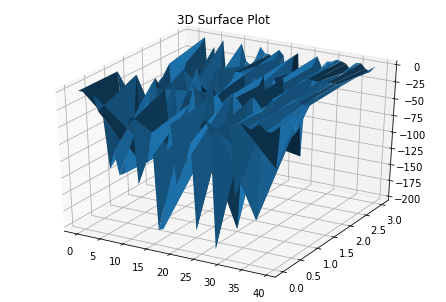

In [39]:
Q[Q < -999999] = 0
from mpl_toolkits.mplot3d import Axes3D
XX, YY = np.meshgrid(list(range(0, 40)), list(range(0, 4)))
ZZ = Q[XX, YY]



fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("3D Surface Plot")
ax.plot_surface(XX, YY, ZZ)

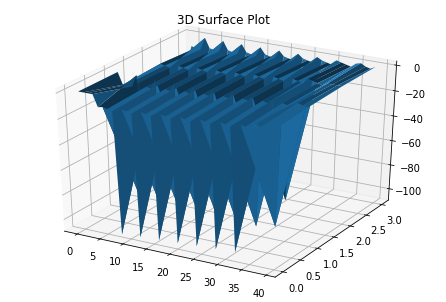

In [38]:
QQ[QQ < -999999] = 0
from mpl_toolkits.mplot3d import Axes3D
XX, YY = np.meshgrid(list(range(0, 40)), list(range(0, 4)))
ZZ = QQ[XX, YY]



fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("3D Surface Plot")
ax.plot_surface(XX, YY, ZZ)